In [2]:
mode = "LS" # LS or IS (latent/image)
ds = "d"

import sys
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
import numpy as np
from sklearn import metrics
utils_path = os.path.abspath(os.path.join('../../'))
if utils_path not in sys.path:
    sys.path.append(utils_path)
from utils.notebookutils import SimaseUSLatentDataset,SimaseUSVideoDataset, SiameseNetwork, model_forward_to_corrcoeff,model_forward_to_pred, model_forward_to_bin_pred, model_forward_to_corr_coeff
import torch
import json

normalization =lambda x: (x  - x.min())/(x.max() - x.min()) * 2 - 1  # should be -1 to 1 due to way we trained the model

#datasets
if mode == "LS": 
    ds_train_dynamic = SimaseUSLatentDataset(phase="training", transform=normalization, latents_csv="/vol/ideadata/at70emic/projects/TMI23/data/diffusion/dynamic/FileList.csv", training_latents_base_path="/vol/ideadata/at70emic/projects/TMI23/data/diffusion/dynamic/Latents", in_memory=False, generator_seed=0)
    ds_train_psax = SimaseUSLatentDataset(phase="training", transform=normalization, latents_csv= "/vol/ideadata/at70emic/projects/TMI23/data/diffusion/PSAX/FileList.csv", training_latents_base_path= "/vol/ideadata/at70emic/projects/TMI23/data/diffusion/PSAX/Latents", in_memory=False, generator_seed=0)
    ds_train_a4c = SimaseUSLatentDataset(phase="training", transform=normalization, latents_csv="/vol/ideadata/at70emic/projects/TMI23/data/diffusion/A4C/FileList.csv", training_latents_base_path= "/vol/ideadata/at70emic/projects/TMI23/data/diffusion/A4C/Latents", in_memory=False, generator_seed=0)

    ds_test_dynamic = SimaseUSLatentDataset(phase="testing", transform=normalization, latents_csv="/vol/ideadata/at70emic/projects/TMI23/data/diffusion/dynamic/FileList.csv", training_latents_base_path="/vol/ideadata/at70emic/projects/TMI23/data/diffusion/dynamic/Latents", in_memory=False, generator_seed=0)
    ds_test_psax = SimaseUSLatentDataset(phase="testing", transform=normalization, latents_csv= "/vol/ideadata/at70emic/projects/TMI23/data/diffusion/PSAX/FileList.csv", training_latents_base_path= "/vol/ideadata/at70emic/projects/TMI23/data/diffusion/PSAX/Latents", in_memory=False, generator_seed=0)
    ds_test_a4c = SimaseUSLatentDataset(phase="testing", transform=normalization, latents_csv="/vol/ideadata/at70emic/projects/TMI23/data/diffusion/A4C/FileList.csv", training_latents_base_path= "/vol/ideadata/at70emic/projects/TMI23/data/diffusion/A4C/Latents", in_memory=False, generator_seed=0)
else: 

    ds_test_dynamic = SimaseUSVideoDataset(phase="testing", transform=normalization, latents_csv="/vol/ideadata/at70emic/datasets/EchoNet-Dynamic/FileList.csv", training_latents_base_path= "/vol/ideadata/at70emic/datasets/EchoNet-Dynamic/Videos", in_memory=False, generator_seed=0)
    ds_test_psax = SimaseUSVideoDataset(phase="testing", transform=normalization, latents_csv= "/vol/ideadata/at70emic/datasets/Echonet-Peds/PSAX/processed/FileList.csv", training_latents_base_path= "/vol/ideadata/at70emic/datasets/Echonet-Peds/PSAX/processed/Videos", in_memory=False, generator_seed=0)
    ds_test_a4c = SimaseUSVideoDataset(phase="testing", transform=normalization, latents_csv="/vol/ideadata/at70emic/datasets/Echonet-Peds/A4C/processed/FileList.csv", training_latents_base_path= "/vol/ideadata/at70emic/datasets/Echonet-Peds/A4C/processed/Videos", in_memory=False, generator_seed=0)

datasets_test = {"d": ds_test_dynamic, "p": ds_test_psax, "a": ds_test_a4c}
datasets_train = {"d": ds_train_dynamic, "p": ds_train_psax, "a": ds_train_a4c}
ds_name_to_name = {"d": "Dynamic", "p": "PSAX", "a": "A4C"}
basepath = "/vol/ideadata/at70emic/projects/TMI23/samples" 
syn_latents_path = {"d": os.path.join(basepath, "lidm_vpred/checkpoint-380000/ddim_64_100k/latents"),
                    "a": os.path.join(basepath, "lidm_vpred_peda4c/checkpoint-470000/ddpm_100k/latents"), 
                    "p": os.path.join(basepath, "lidm_vpred_pedpsax/checkpoint-420000/ddpm_100/latents")} 

#load models
models = {"a": None, "d": None, "p": None}
for model_name, model_ending in zip(["a", "d", "p"], ["a4c", "Dynamic", "psax"]): 
    model_basepath = f"/vol/ideadata/ed52egek/pycharm/privatis_us/archive/{model_ending}{mode}Best"
    with open(os.path.join(model_basepath, "config.json")) as config:
        config = config.read()

    # parse config
    config = json.loads(config)
    net = SiameseNetwork(network=config['siamese_architecture'], in_channels=config['n_channels'], n_features=config['n_features'])
    net = net.eval()
    net = net.cuda()
    best_name = [x for x in os.listdir(model_basepath) if x.endswith("best_network.pth")][0]
    net.load_state_dict(torch.load(os.path.join(model_basepath, best_name)))
    models[model_name] = net


/vol/ideadata/ed52egek/conda/latecho/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Set training dataset seed to 0
Set training dataset seed to 0
Set training dataset seed to 0
Set testing dataset seed to 0
Set testing dataset seed to 0
Set testing dataset seed to 0


/vol/ideadata/ed52egek/conda/latecho/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/vol/ideadata/ed52egek/conda/latecho/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
# image conditionals 
synthetic_image_datasets = {}

for dscur, synthetic_latent_path in syn_latents_path.items(): 
    if dscur != ds: 
        continue
    synthetic_images_paths = [x for x in os.listdir(synthetic_latent_path)]
    synthetic_images = [torch.load(os.path.join(synthetic_latent_path, x)) for x in synthetic_images_paths]

    # convert images to 1 x C x H x W to be consistent in case we want to check videos 
    for i in range(len(synthetic_images)): 
        if len(synthetic_images[i].size()) == 3: 
            synthetic_images[i] = synthetic_images[i].unsqueeze(dim=0)

    synthetic_images = normalization(torch.cat(synthetic_images))
    print(f"Number of synthetic images found for {ds_name_to_name[dscur]}: {len(synthetic_images)}")
    synthetic_image_datasets[dscur] = synthetic_images


Number of synthetic images found for Dynamic: 100000


## Define how to sample images from training and validation videos
Each frame has to pass through the network so don't be wasteful

I **only take the first fram** technically it should not mattere in a video scenario  



In [4]:
from functools import partial
def first_frame(vid): 
    return vid[0:1]

def subsample(vid, every_nth_frame): 
    frames = np.arange(0, len(vid), step=every_nth_frame)
    return vid[frames]

train_vid_to_img = first_frame # partial(subsample, every_nth_frame=50)
test_vid_to_img = first_frame 

Dataset: Dynamic
Number of real train frames: 7465
Number of real test frames: 1277


Computing Synthetic Feature distances: 100%|██████████| 100000/100000 [00:13<00:00, 7558.71it/s]


Privacy threshold tau: 6.0037510871887205
Learned synthetic images: 1512 = 0.20254521098459477 
vs. number of closest pairs between train and test set :  1098 = 0.8598277212216131.
Memorized samples: 6772
Learned samples after applying privacy filter: 1506


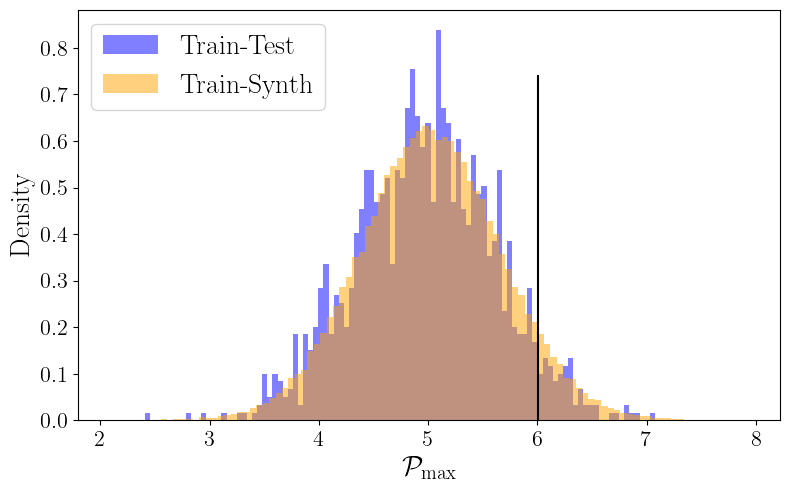

In [5]:
from tqdm import tqdm
from einops import repeat
import matplotlib.pyplot as plt
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "text.latex.preamble": r"\usepackage{amsmath}"
})

bs = 256
PRED_FUNCITON = "model_head"


print(f"Dataset: {ds_name_to_name[ds]}")
model = models[ds]
ds_train = datasets_train[ds]
ds_test = datasets_test[ds]
ds_synth = synthetic_image_datasets[ds]

train_images = torch.cat([train_vid_to_img(x) for x in ds_train])
test_images = torch.cat([test_vid_to_img(x) for x in ds_test])
print(f"Number of real train frames: {len(train_images)}")
print(f"Number of real test frames: {len(test_images)}")

feature_train = []
feature_test = []
feature_synth = []
with torch.no_grad():
    for i in tqdm(np.arange(0, len(train_images), bs), "Computing Train Feature Embeddings"):
        batch = train_images[i:i+bs].cuda()
        feature_train.append(model.forward_once(batch))

    for i in tqdm(np.arange(0, len(test_images), bs), "Computing Test Feature Embeddings"):
        batch = test_images[i:i+bs].cuda()
        feature_test.append(model.forward_once(batch))

    for i in tqdm(np.arange(0, len(synthetic_images), bs), "Computing Synthetic Feature Embeddings"):
        batch = synthetic_images[i:i+bs].cuda()
        feature_synth.append(model.forward_once(batch))

feature_train = torch.cat(feature_train)
feature_test = torch.cat(feature_test)
feature_synth = torch.cat(feature_synth)

if PRED_FUNCITON == "model_head": 
    prediction_function = model.prediction_head_forward

max_scores_test = []
argmax_scores_test = []
with torch.no_grad(): 
    for i in tqdm(range(len(feature_test)), "Computing test feature distances"):
        latent_synth_image = repeat(feature_test[i:i+1], "1 h -> b h", b=len(feature_train))
        predictions = prediction_function(latent_synth_image, feature_train).cpu()
        max_scores_test.append(predictions.max())
        argmax_scores_test.append(predictions.argmax())


max_scores_synth = []
argmax_scores_synth = []
with torch.no_grad(): 
    for i in tqdm(range(len(feature_synth)), "Computing Synthetic Feature distances"):
        latent_synth_image = repeat(feature_synth[i:i+1], "1 h -> b h", b=len(feature_train))
        predictions = prediction_function(latent_synth_image, feature_train).cpu()
        max_scores_synth.append(predictions.max())
        argmax_scores_synth.append(predictions.argmax())

# Computing tau
tau = np.percentile(torch.stack(max_scores_test).numpy(), 95)
print(f"Privacy threshold tau: {tau}")

learned_synth = set([float(x) for x in argmax_scores_synth])
learned_test = set([float(x) for x in argmax_scores_test])
print(f"Learned synthetic images: {len(learned_synth)} = {len(learned_synth) / min(len(feature_train), len(feature_synth))} \n" + 
                                                        f"vs. number of closest pairs between train and test set :  {len(learned_test)} = {len(learned_test) / min(len(feature_train), len(feature_test))}.")

print(f"Memorized samples: {sum(max_scores_synth > tau)}")
print(f"Learned samples after applying privacy filter: {len(torch.stack(argmax_scores_synth).squeeze()[torch.stack(max_scores_synth).squeeze() < tau].unique())}")

density = True
fig, ax = plt.subplots(figsize=(8, 5))
nt, bins, patches = ax.hist(max_scores_test, 100, density=density, label="Train-Test", alpha=0.5, color="blue")
ns, bins, patches = ax.hist(max_scores_synth, 100, density=density, label="Train-Synth", alpha=.5, color="orange")
ax.axvline(tau, 0, max(max(nt), max(ns)), color="black")
ax.set_xlabel(r'$\mathcal{P}_{\text{max}}$', fontsize=20)
ax.set_ylabel('Density', fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=16)

# Tweak spacing to prevent clipping of ylabel
plt.legend(fontsize=20)
fig.tight_layout()
plt.savefig(f"privacy_results_{ds_name_to_name[ds]}_predfunction_{PRED_FUNCITON}.pdf", dpi=600)
plt.show()


Image with most appearances has: 879 appearances


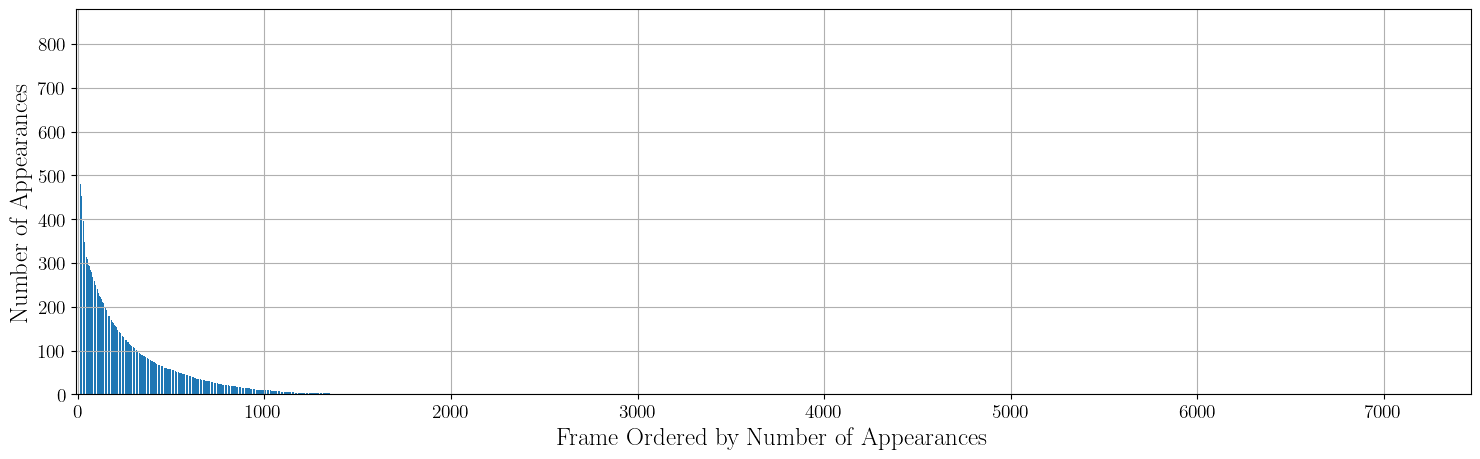

In [6]:
import pandas as pd

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "text.latex.preamble": r"\usepackage{amsmath}"
})

fig, ax = plt.subplots(figsize=(18, 5))

learned_synth = pd.Series([float(x) for x in argmax_scores_synth])
vals = learned_synth.value_counts().reset_index()
print(f"Image with most appearances has: {vals['count'][0]} appearances")
ax.grid(True)
ol = ax.bar(np.arange(len(vals)), vals["count"])
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_ylim(0, max(vals["count"]))
ax.set_xlim(-10, len(ds_train))
ax.set_ylabel('Number of Appearances', fontsize=18)
ax.set_xlabel('Frame Ordered by Number of Appearances', fontsize=18)
plt.savefig(f"{ds_name_to_name[ds]}_appearances.pdf", dpi=600)
plt.show()


In [7]:
argmax_scores_synth

[tensor(3245),
 tensor(6508),
 tensor(4719),
 tensor(7418),
 tensor(354),
 tensor(794),
 tensor(781),
 tensor(4875),
 tensor(2441),
 tensor(1645),
 tensor(635),
 tensor(7108),
 tensor(4277),
 tensor(375),
 tensor(2497),
 tensor(3314),
 tensor(7372),
 tensor(781),
 tensor(479),
 tensor(4147),
 tensor(6110),
 tensor(3379),
 tensor(6788),
 tensor(2148),
 tensor(6415),
 tensor(7042),
 tensor(5964),
 tensor(7224),
 tensor(7256),
 tensor(2666),
 tensor(2575),
 tensor(3373),
 tensor(5849),
 tensor(3034),
 tensor(4619),
 tensor(6004),
 tensor(104),
 tensor(3699),
 tensor(1930),
 tensor(4110),
 tensor(819),
 tensor(1448),
 tensor(594),
 tensor(4124),
 tensor(2484),
 tensor(3452),
 tensor(653),
 tensor(4491),
 tensor(762),
 tensor(503),
 tensor(5926),
 tensor(5854),
 tensor(4949),
 tensor(3408),
 tensor(69),
 tensor(3143),
 tensor(2775),
 tensor(361),
 tensor(1064),
 tensor(5895),
 tensor(4134),
 tensor(1122),
 tensor(781),
 tensor(4719),
 tensor(523),
 tensor(660),
 tensor(214),
 tensor(5660),


In [7]:
#torch.stack(argmax_scores_synth).squeeze()[torch.stack(max_scores_synth).squeeze() < tau]
df = pd.DataFrame({"closest": [int(x) for x in argmax_scores_synth], "canbeshared":[bool(x) for x in list(torch.stack(max_scores_synth).squeeze() < tau)]})
df

,closest,canbeshared
0,3245,True
1,6508,True
2,4719,True
3,7418,False
4,354,True
...,...,...
99995,5274,True
99996,3699,True
99997,6017,True
99998,5597,True


In [9]:
df_canbeshared = df[df["canbeshared"]].sample(frac=1.0)
df_synth_train = df_canbeshared.drop_duplicates(subset="closest")

train_vids = list(df_synth_train.index)
print(f"Number of train vids: {len(train_vids)} that we take from the train dataset with index: {str(train_vids[:5])[:-1]} ...")

df_synth_train

Number of train vids: 1506 that we take from the train dataset with index: [78153, 39373, 87272, 83177, 54238 ...


,closest,canbeshared
78153,4719,True
39373,3088,True
87272,6715,True
83177,6050,True
54238,1257,True
...,...,...
68184,6987,True
44173,2014,True
3250,683,True
32841,2073,True


In [10]:
# Group by "closest" and sample up to 5 rows from each group
df_canbeshared["index"] = df_canbeshared.index 
df_synth_aug = df_canbeshared.groupby('closest').apply(lambda x: x.sample(min(len(x), 5))).reset_index(drop=True).set_index("index")
print(f"Size of augmented dataset where each train video only occurs at maximum 5 times: {len(df_synth_aug)}")
df_synth_aug


Size of augmented dataset where each train video only occurs at maximum 5 times: 6487


,closest,canbeshared
index,,
20453,5,True
74528,5,True
89499,5,True
50400,5,True
20295,5,True
...,...,...
27560,7454,True
61153,7454,True
5370,7454,True


In [11]:
train_ds = datasets_train[ds]
train_filelist = train_ds.df
closest = list(df_canbeshared["closest"].unique())
closest = sorted(closest)
not_closest = [x for x in np.arange(len(train_ds)) if x not in closest]
not_closest
not_closest_filenames = list(train_filelist.iloc[not_closest]["FileName"])
not_closest_filenames[:4]

['0X1002E8FBACD08477',
 '0X1005D03EED19C65B',
 '0X10075961BC11C88E',
 '0X100E3B8D3280BEC5']

## Copy Real data but limited to a smaller subset

In [12]:
from tqdm import tqdm
import shutil
real_vids_paths = {
    "d":"/vol/ideadata/at70emic/datasets/EchoNet-Dynamic/Videos",
    "p":"/vol/ideadata/at70emic/datasets/Echonet-Peds/PSAX/processed/Videos",
    "a": "/vol/ideadata/at70emic/datasets/Echonet-Peds/A4C/processed/Videos"}

out_base_dir = "/vol/ideadata/ed52egek/pycharm/privatis_us/new_datasets"
out_dir = os.path.join(out_base_dir, f"{ds_name_to_name[ds]}/real")
os.makedirs(out_dir, exist_ok=True)

full_ds = pd.read_csv(os.path.join(os.path.dirname(real_vids_paths[ds]), "FileList.csv"))
new_train_ds_real = full_ds[~full_ds['FileName'].isin(not_closest_filenames)].reset_index(drop=True)
new_train_ds_real.to_csv(os.path.join(out_dir, "FileList.csv"))
print(new_train_ds_real.Split.value_counts())

os.makedirs(os.path.join(out_dir, f"Videos"), exist_ok=True)
data_base_path = real_vids_paths[ds]
for filename in tqdm(new_train_ds_real["FileName"], "Copying files to new training dir"): 
    shutil.copy(os.path.join(data_base_path, f"{filename}.avi"), os.path.join(out_dir, f"Videos/{filename}.avi"))

Copying files to new training dir: 100%|██████████| 4071/4071 [00:16<00:00, 249.06it/s]


## Copy synthetic data but limited to a smaller subset equal to that of the size of the real dataset

In [13]:
from tqdm import tqdm
import shutil
syn_vids_paths = {
    "d":"/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_dynamic_syn/",
    "p":"/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_ped_psax_syn/",
    "a": "/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_ped_a4c_syn/"}

out_base_dir = "/vol/ideadata/ed52egek/pycharm/privatis_us/new_datasets"
out_dir = os.path.join(out_base_dir, f"{ds_name_to_name[ds]}/real")
os.makedirs(out_dir, exist_ok=True)

full_syn_ds = pd.read_csv(os.path.join(syn_vids_paths[ds], "FileList.csv"))
full_syn_ds

new_train_ds_syn = full_syn_ds[full_syn_ds['FileName'].map(lambda x: int(x[7:])).isin(list(df_synth_train.index))].reset_index(drop=True)
new_train_ds_syn


,FileName,EF,ESV,EDV,FrameHeight,FrameWidth,FPS,NumberOfFrames,Split
0,sample_000044,14,0,0,128,112,32,8,TRAIN
1,sample_000047,77,0,0,128,112,32,8,TRAIN
2,sample_000084,85,0,0,128,112,32,8,TRAIN
3,sample_000153,26,0,0,128,112,32,8,TRAIN
4,sample_000373,50,0,0,128,112,32,8,TRAIN
...,...,...,...,...,...,...,...,...,...
1501,sample_099733,22,0,0,128,112,32,8,TRAIN
1502,sample_099784,17,0,0,128,112,32,8,TRAIN
1503,sample_099831,51,0,0,128,112,32,8,TRAIN
1504,sample_099925,22,0,0,128,112,32,8,TRAIN


In [14]:
#train_vids
df_val_synth = df_canbeshared[~df_canbeshared["index"].isin(train_vids)].drop_duplicates(subset="closest")
print(f"Number of validation images: {len(df_val_synth)}")
df_val_synth

Number of validation images: 1350


,closest,canbeshared,index
76985,5950,True,76985
18823,2977,True,18823
42674,1713,True,42674
38594,5396,True,38594
50766,3932,True,50766
...,...,...,...
11801,5568,True,11801
98648,2757,True,98648
87736,6920,True,87736
53413,5912,True,53413


In [36]:
new_test_ds_syn = full_ds[full_ds.Split == "TEST"] # testing on real images
print(f"Testing on real images. Number of test images: {len(new_test_ds_syn)}")

Testing on real images. Number of test images: 1277


In [15]:
new_val_ds_syn = full_syn_ds[full_syn_ds['FileName'].map(lambda x: int(x[7:])).isin(list(df_val_synth.index))].reset_index(drop=True)
new_val_ds_syn["Split"] = "VAL"
new_val_ds_syn

,FileName,EF,ESV,EDV,FrameHeight,FrameWidth,FPS,NumberOfFrames,Split
0,sample_000049,62,0,0,128,112,32,8,VAL
1,sample_000065,85,0,0,128,112,32,8,VAL
2,sample_000222,32,0,0,128,112,32,8,VAL
3,sample_000283,52,0,0,128,112,32,8,VAL
4,sample_000288,29,0,0,128,112,32,8,VAL
...,...,...,...,...,...,...,...,...,...
1345,sample_099650,21,0,0,128,112,32,8,VAL
1346,sample_099775,76,0,0,128,112,32,8,VAL
1347,sample_099790,35,0,0,128,112,32,8,VAL
1348,sample_099840,17,0,0,128,112,32,8,VAL


In [16]:
new_test_ds_syn = full_ds[full_ds.Split == "TEST"] # testing on real images
new_full_ds_syn = pd.concat([new_train_ds_syn, new_val_ds_syn, new_test_ds_syn])
print(new_full_ds_syn.Split.value_counts())

new_full_ds_syn

Split
TRAIN    1506
VAL      1350
TEST     1277
Name: count, dtype: int64


,FileName,EF,ESV,EDV,FrameHeight,FrameWidth,FPS,NumberOfFrames,Split
0,sample_000044,14.000000,0.000000,0.000000,128,112,32,8,TRAIN
1,sample_000047,77.000000,0.000000,0.000000,128,112,32,8,TRAIN
2,sample_000084,85.000000,0.000000,0.000000,128,112,32,8,TRAIN
3,sample_000153,26.000000,0.000000,0.000000,128,112,32,8,TRAIN
4,sample_000373,50.000000,0.000000,0.000000,128,112,32,8,TRAIN
...,...,...,...,...,...,...,...,...,...
9976,0XF557EF658FD13D0,52.836650,39.361130,83.457028,112,112,50,179,TEST
9982,0XF6661AF354401A5,64.829583,35.298444,100.364020,112,112,50,221,TEST
9990,0XF829F634971A0F7,65.125501,28.270738,81.064211,112,112,50,183,TEST
10021,0XFE6E32991136338,32.783248,113.063526,168.207364,112,112,43,120,TEST


In [17]:
out_dir = os.path.join(out_base_dir, f"{ds_name_to_name[ds]}/syn")
os.makedirs(os.path.join(out_dir, f"Videos"), exist_ok=True)
real_data_base_path = real_vids_paths[ds]
syn_data_base_path = syn_vids_paths[ds]
new_full_ds_syn.to_csv(os.path.join(out_dir, "FileList.csv"))
for filename, split in tqdm(zip(new_full_ds_syn["FileName"], new_full_ds_syn["Split"]), "Copying files to new training dir"): 
    if split == "TEST": 
        shutil.copy(os.path.join(real_data_base_path, f"{filename}.avi"), os.path.join(out_dir, f"Videos/{filename}.avi"))
    else: 
        shutil.copy(os.path.join(syn_data_base_path, f"avi/{filename}.avi"), os.path.join(out_dir, f"Videos/{filename}.avi"))

    

Copying files to new training dir: 0it [00:00, ?it/s]

Copying files to new training dir: 4133it [00:20, 206.07it/s]


## Same but this time pretend we are augmenting by sampling each video five times

In [18]:
from tqdm import tqdm
import shutil
syn_vids_paths = {
    "d":"/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_dynamic_syn/",
    "p":"/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_ped_psax_syn/",
    "a": "/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_ped_a4c_syn/"}

out_base_dir = "/vol/ideadata/ed52egek/pycharm/privatis_us/new_datasets"
out_dir = os.path.join(out_base_dir, f"{ds_name_to_name[ds]}/real")
os.makedirs(out_dir, exist_ok=True)

full_syn_ds = pd.read_csv(os.path.join(syn_vids_paths[ds], "FileList.csv"))
full_syn_ds

new_train_ds_syn = full_syn_ds[full_syn_ds['FileName'].map(lambda x: int(x[7:])).isin(list(df_synth_aug.index))].reset_index(drop=True)
new_train_ds_syn


new_full_ds_syn = pd.concat([new_train_ds_syn, new_val_ds_syn, new_test_ds_syn])
print(new_full_ds_syn.Split.value_counts())

new_full_ds_syn


out_dir = os.path.join(out_base_dir, f"{ds_name_to_name[ds]}/synaug")
os.makedirs(os.path.join(out_dir, f"Videos"), exist_ok=True)
real_data_base_path = real_vids_paths[ds]
syn_data_base_path = syn_vids_paths[ds]
new_full_ds_syn.to_csv(os.path.join(out_dir, "FileList.csv"))
for filename, split in tqdm(zip(new_full_ds_syn["FileName"], new_full_ds_syn["Split"]), "Copying files to new training dir"): 
    if split == "TEST": 
        shutil.copy(os.path.join(real_data_base_path, f"{filename}.avi"), os.path.join(out_dir, f"Videos/{filename}.avi"))
    else: 
        shutil.copy(os.path.join(syn_data_base_path, f"avi/{filename}.avi"), os.path.join(out_dir, f"Videos/{filename}.avi"))



Split
TRAIN    6487
VAL      1350
TEST     1277
Name: count, dtype: int64


Copying files to new training dir: 9114it [00:57, 158.48it/s]


# Baseline Datasets 

Compute the FileList and the folder for the baseline datasets. The first one contains all private videos, 1288 of which we use for validation (same as real train dataset) this is called **synaugmented**

Additionally, we compute a Filelist and folder with the same size as the original train dataset. We call this **syn**

### Find validation dataset for both 


In [26]:
df_syn_all_val = df_canbeshared.sample(full_ds.Split.value_counts()["VAL"])
df_syn_all_train = df_canbeshared[~df_canbeshared.isin(df_syn_all_val)]

df_syn_rdm_train = df_syn_all_train.sample(len(ds_train))

print(f"Number of videos in synthetic 'all' train dataset {len(df_syn_all_train)}")
print(f"Number of videos in synthetic 'all' val dataset {len(df_syn_all_val)}")
print(f"Number of videos in synthetic 'rdm' dataset {len(df_syn_rdm)}")
df_syn_rdm.head(5)

Number of videos in synthetic 'all' train dataset 93228
Number of videos in synthetic 'all' val dataset 1288
Number of videos in synthetic 'rdm' dataset 7465


,closest,canbeshared
98345,3508,True
35382,6011,True
61170,3292,True
5333,1045,True
25890,5998,True


In [39]:
new_val_ds_syn_full = full_syn_ds[full_syn_ds['FileName'].map(lambda x: int(x[7:])).isin(list(df_syn_all_val.index))].reset_index(drop=True) 
new_val_ds_syn_full["Split"] = "VAL"
new_val_ds_syn_full

,FileName,EF,ESV,EDV,FrameHeight,FrameWidth,FPS,NumberOfFrames,Split
0,sample_000055,21,0,0,128,112,32,8,VAL
1,sample_000083,29,0,0,128,112,32,8,VAL
2,sample_000147,58,0,0,128,112,32,8,VAL
3,sample_000173,63,0,0,128,112,32,8,VAL
4,sample_000242,29,0,0,128,112,32,8,VAL
...,...,...,...,...,...,...,...,...,...
1283,sample_099497,22,0,0,128,112,32,8,VAL
1284,sample_099534,22,0,0,128,112,32,8,VAL
1285,sample_099558,72,0,0,128,112,32,8,VAL
1286,sample_099584,84,0,0,128,112,32,8,VAL


## Synaug

In [43]:
from tqdm import tqdm
import shutil
#out_base_dir = "/vol/ideadata/ed52egek/pycharm/privatis_us/new_datasets"
syn_vids_paths = {
    "d":"/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_dynamic_syn/",
    "p":"/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_ped_psax_syn/",
    "a": "/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_ped_a4c_syn/"}


out_dir = os.path.join(out_base_dir, f"{ds_name_to_name[ds]}/full/synaug")
os.makedirs(os.path.join(out_dir, f"Videos"), exist_ok=True)

full_syn_ds = pd.read_csv(os.path.join(syn_vids_paths[ds], "FileList.csv"))
full_syn_ds # all 100k vids

new_train_ds_full_synaug = full_syn_ds[full_syn_ds['FileName'].map(lambda x: int(x[7:])).isin(list(df_syn_all_train.index))].reset_index(drop=True)
new_train_ds_full_synaug


new_full_ds_syn = pd.concat([new_train_ds_full_synaug, new_val_ds_syn_full, new_test_ds_syn])
print(new_full_ds_syn.Split.value_counts())
new_full_ds_syn

#
#new_full_ds_syn
#
#
real_data_base_path = real_vids_paths[ds]
syn_data_base_path = syn_vids_paths[ds]
new_full_ds_syn.to_csv(os.path.join(out_dir, "FileList.csv"))
for filename, split in tqdm(zip(new_full_ds_syn["FileName"], new_full_ds_syn["Split"]), "Copying files to new training dir", total=len(new_full_ds_syn)): 
    if split == "TEST": 
        shutil.copy(os.path.join(real_data_base_path, f"{filename}.avi"), os.path.join(out_dir, f"Videos/{filename}.avi"))
    else: 
        shutil.copy(os.path.join(syn_data_base_path, f"avi/{filename}.avi"), os.path.join(out_dir, f"Videos/{filename}.avi"))


Split
TRAIN    93228
VAL       1288
TEST      1277
Name: count, dtype: int64


Copying files to new training dir: 100%|██████████| 95793/95793 [11:10<00:00, 142.91it/s]


# Now we only use as many videos as we would use for training with the real dataset

In [44]:
from tqdm import tqdm
import shutil
#out_base_dir = "/vol/ideadata/ed52egek/pycharm/privatis_us/new_datasets"
syn_vids_paths = {
    "d":"/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_dynamic_syn/",
    "p":"/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_ped_psax_syn/",
    "a": "/vol/ideadata/at70emic/projects/EchoNet-Synthetic/samples/lvdm_ped_a4c_syn/"}


out_dir = os.path.join(out_base_dir, f"{ds_name_to_name[ds]}/full/syn")
os.makedirs(os.path.join(out_dir, f"Videos"), exist_ok=True)

full_syn_ds = pd.read_csv(os.path.join(syn_vids_paths[ds], "FileList.csv"))
full_syn_ds # all 100k vids

new_train_ds_full_synaug = full_syn_ds[full_syn_ds['FileName'].map(lambda x: int(x[7:])).isin(list(df_syn_rdm_train.index))].reset_index(drop=True)
new_train_ds_full_synaug


new_full_ds_syn = pd.concat([new_train_ds_full_synaug, new_val_ds_syn_full, new_test_ds_syn])
print(new_full_ds_syn.Split.value_counts())
new_full_ds_syn


real_data_base_path = real_vids_paths[ds]
syn_data_base_path = syn_vids_paths[ds]
new_full_ds_syn.to_csv(os.path.join(out_dir, "FileList.csv"))
for filename, split in tqdm(zip(new_full_ds_syn["FileName"], new_full_ds_syn["Split"]), "Copying files to new training dir", total=len(new_full_ds_syn)): 
    if split == "TEST": 
        shutil.copy(os.path.join(real_data_base_path, f"{filename}.avi"), os.path.join(out_dir, f"Videos/{filename}.avi"))
    else: 
        shutil.copy(os.path.join(syn_data_base_path, f"avi/{filename}.avi"), os.path.join(out_dir, f"Videos/{filename}.avi"))


Split
TRAIN    7465
VAL      1288
TEST     1277
Name: count, dtype: int64


Copying files to new training dir: 100%|██████████| 10030/10030 [00:46<00:00, 214.83it/s]
